# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.424498e+01     1.921134e+01
 * time: 0.0024580955505371094
     1     6.312162e+01     1.152862e+01
 * time: 0.007394075393676758
     2     5.601175e+01     1.386384e+01
 * time: 0.018501996994018555
     3     4.042347e+01     1.148984e+01
 * time: 0.08470606803894043
     4     2.980641e+01     1.070453e+01
 * time: 0.10038208961486816
     5     2.407800e+01     8.677151e+00
 * time: 0.11363816261291504
     6     1.090768e+01     2.229779e+00
 * time: 0.12752699851989746
     7     8.231936e+00     3.468427e+00
 * time: 0.13959312438964844
     8     6.774344e+00     2.088035e+00
 * time: 0.15250015258789062
     9     6.433913e+00     1.517457e+00
 * time: 0.16429495811462402
    10     6.141637e+00     1.080553e+00
 * time: 0.2055680751800537
    11     6.024467e+00     8.564616e-01
 * time: 0.21828913688659668
    12     6.019600e+00     1.293761e+00
 * time: 0.22728514671325684
    13     5.999730e+00     7.725190e-01
 * ti

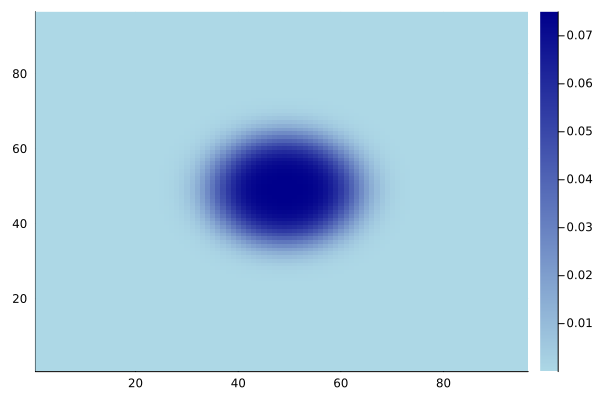

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)